# DAML BSU Course 2025 Final Project

## Specification

### Problem statement
Are there any metrics I can use or derive that can describe patterns of citation use in UG literature reviews?
Initial answer: poorer work uses citations that are less tightly-bound to one another and more likely to be outside of the genre.

## Extract, Transform, Load version1
1. identify two training documents
    1.1 MJ from last year (90% very clear focus)
    1.2 training_2 from this year
2. strip out all material before and after lit review except reference list
3. Structuring the data
    * how do I identify headers for the proximity metric?
    * how do I extract bibliographic info into a graph?
    * ruby gem - anystyle.io
    * For now quick and dirty and do manually on anystyle.io web client

In [ ]:
'''

# Needed for full implementation - allows running anystyle.io as system call from Python
# This is a simple example of how to run a Ruby script from Python and capture the output.
# The subprocess module is used to run the Ruby script and capture the output.
# Student citations likely to be very noisy data so clean up will be needed
import subprocess

# Path to your Ruby script
ruby_script = 'path/to/your_script.rb'

# Execute the Ruby script
result = subprocess.run(['ruby', ruby_script], capture_output=True, text=True)

# Print the output from the Ruby script
print(result.stdout)

'''


In [7]:
# Let's see what the json output from anystyle.io looks like
import pandas as pd

df=pd.read_json('training2_citations.json')
df.head(100)
# cleanup author field

#newdf = df.drop_duplicates()
#newdf.head(100)

# author field needs splitting into first and last name for each author
# more importantly, no DOI info which is the most important field for linking to other data sources

,author,title,publisher,volume,language,type,issued,page,publisher-place,editor,note,container-title,issue,URL,DOI,edition
0,"[{'given': 'Alverson'}, {'given': 'Sandberg'},...",Research Methods in Education,Routledge,9 and 10,en,book,{'date-parts': [[2011]]},195 – 216,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[{'given': 'Atkinson'}],Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1985]]},237–247,NaN,"[{'family': 'Edwards', 'given': 'A.D.'}]",Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN
2,"[{'family': 'Bernstein', 'given': 'B.'}]",'Elaborated and Restricted Codes: Their Social...,The Ethnography of Communication,"66(6, Part 2",en,article-journal,{'date-parts': [[1964]]},55–69,NaN,NaN,Available at:,American Anthropologist,NaN,https://www.jstor.org/stable/668161,NaN,NaN
3,"[{'family': 'Bernstein', 'given': 'B.'}]",'Elaborated and Restricted Codes: Their Social...,The Ethnography of Communication,"66(6, Part 2",en,article-journal,{'date-parts': [[1964]]},55–69,NaN,NaN,Available at:,American Anthropologist,NaN,https://www.jstor.org/stable/668161,NaN,NaN
4,"[{'given': 'Bogdan'}, {'given': 'Biklen'}, {'f...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[1998]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN
5,"[{'family': 'Booth', 'given': 'A.'}, {'family'...",Systematic Approaches to a Successful Literatu...,SAGE Publications Ltd,NaN,en,book,{'date-parts': [[2021]]},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3rd
6,[{'given': 'Bourdieu'}],Cultural Theory,An Anthology Wiley & Sons,NaN,en,None,{'date-parts': [[1986]]},NaN,NaN,"[{'family': 'Szeman', 'given': 'I.'}, {'family...",Available at:,NaN,NaN,https://books.google.co.uk/books?id=O5uGEAAAQB...,NaN,NaN
7,[{'given': 'Bourdieu'}],Cultural Theory,An Anthology Wiley & Sons,NaN,en,None,{'date-parts': [[1986]]},NaN,NaN,"[{'family': 'Szeman', 'given': 'I.'}, {'family...",Available at:,NaN,NaN,https://books.google.co.uk/books?id=O5uGEAAAQB...,NaN,NaN
8,"[{'given': 'Brymann'}, {'family': 'Tubey', 'gi...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[2001]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN
9,"[{'family': 'Cohen', 'given': 'Manion'}, {'giv...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[2000]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN


In [ ]:
def url_lookup(citation_url):
    # use crossref API to get metadata for DOI
    
    return None

## ETL step 1 version2

Extract citations from ref list using anystyle.io for json

TODO: remove citations not used in lit review (for loop matching inline cites dictionarylist (need to extract using regex?) with reference list dictionarylist)

# ETL step 2

match references against semanticscholar api [boolean check]

extract derived/prior cites from api

openData alternative (better?) is https://docs.openalex.org/how-to-use-the-api/api-overview

build graph

# analysis 
assess graph

# Data Structure
## chainmap? list of dictionaries

key: DOI identified from API matching call 
value: list_cited (DOI strings returned from API call)
value: list_referenced (DOI strings returned from API call)

Some keys wil be in lists_cited/referenced for other records.

list_cited = {DOI_from_studentReferenceList : (tuple of works referenced by DOI)}
list_reffed = {DOI_from_studentReferenceList: {tuple of works citing DOI}}

linked_cites = chainmap(list_cited, list_reffed)


### Build graph


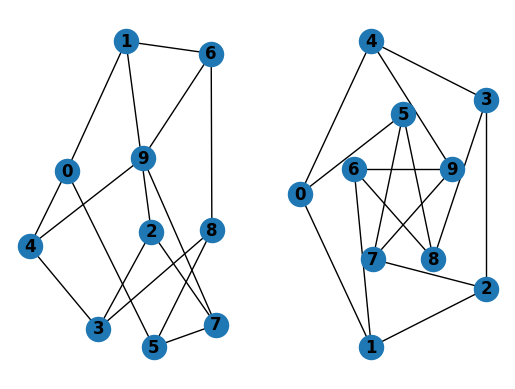

In [1]:
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

# Example KG

'''G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['title'], type='paper')'''
    
    #Test graph
    
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

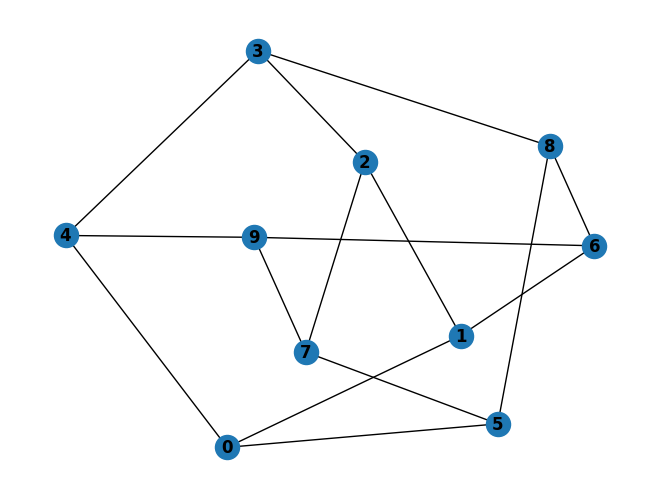

In [2]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

# Chainmap examples - https://realpython.com/python-chainmap/

>>> from collections import ChainMap
>>> from collections import OrderedDict, defaultdict

>>> # Use no arguments
>>> ChainMap()
ChainMap({})

>>> # Use regular dictionaries
>>> numbers = {"one": 1, "two": 2}
>>> letters = {"a": "A", "b": "B"}

>>> ChainMap(numbers, letters)
ChainMap({'one': 1, 'two': 2}, {'a': 'A', 'b': 'B'})

>>> ChainMap(numbers, {"a": "A", "b": "B"})
ChainMap({'one': 1, 'two': 2}, {'a': 'A', 'b': 'B'})

>>> # Use other mappings
>>> numbers = OrderedDict(one=1, two=2)
>>> letters = defaultdict(str, {"a": "A", "b": "B"})
>>> ChainMap(numbers, letters)
ChainMap(
    OrderedDict([('one', 1), ('two', 2)]),
    defaultdict(<class 'str'>, {'a': 'A', 'b': 'B'})
)

In [ ]:
import requests
import pandas as pd

# This search obtains paperId, title and matchscore fields
response = requests.get('https://api.semanticscholar.org/graph/v1/paper/search/match?query=What emotional-centred challenges do children attending special schools face over primary secondary school transition?')
data = response.json()

df = pd.json_normalize(data['data'])
df.head()

# Let's get the paper references for the first paper
response = requests.get('https://api.semanticscholar.org/graph/v1/paper/26d463146dfbcfa1e4e531eddc16ae6c74a5c45e/references?fields=contexts,intents,isInfluential,externalIds,year,abstract&offset=0&limit=100')
data = response.json()

list_of_references = pd.json_normalize(data['data'])
list_of_references.head()
#df.head()

,intents,isInfluential,contexts,citedPaper.paperId,citedPaper.externalIds.MAG,citedPaper.externalIds.DOI,citedPaper.externalIds.CorpusId,citedPaper.abstract,citedPaper.year,citedPaper.externalIds.PubMed,citedPaper.externalIds
0,[background],True,[…Wiley & Sons Ltd on behalf of National Assoc...,1824cc642de0971ca09fecb9f46309e66dc9eb0b,3120855306,10.1080/02643944.2020.1855669,234288080.0,"ABSTRACT Across countries, the age and timing ...",2021,NaN,NaN
1,[],False,[],91ea2904beaa46ab80ee8c63be663c85017b00e9,2921784536,10.1111/bjep.12273,76662055.0,BACKGROUND\nPrimary-secondary school transitio...,2020,30868577,NaN
2,[background],True,[See Bagnall (2020) for a full outline of limi...,d29ae903413f33bc272b16b20cdb46c12bac3b59,3002773696,10.1080/02643944.2020.1713870,213028364.0,ABSTRACT Transitions are an unavoidable part o...,2020,NaN,NaN
3,[background],True,"[Nonetheless, children with SEMH difficulties ...",fedaace877a9497cdd75bf0bac3967e366a66615,2921897712,10.1080/13632752.2019.1587899,150864549.0,ABSTRACT Young people whose behaviour does not...,2019,NaN,NaN
4,[background],True,"[, 2017), greater focus on the school environm...",0361b823a2bb198b5bc81080247c1baf6fcdad66,2909151624,10.1080/13632752.2018.1564498,149619409.0,ABSTRACT Transitions represent an important mi...,2019,NaN,NaN


# TODO:
work out what data fields I need from API

work out how to write loop that cycles through student paperId from essay reference list and gathers all other paperIds

## Sandbox
### Installing and testing libraries

### semanticscholar api



### Litstudy

In [ ]:
# Cell taken from litstudy man page
# Installed Python 3.9 env in addition to existing 3.13 install 
# and installed litstudy in the new environment
# This cell is to test that the new environment is working correctly
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [ ]:
#Load in the bibliographic data using litstudy function

docs_example = litstudy.load_ris_file(r'C:\Users\admin\OneDrive - DAML_DarrenGarside\Documents\Exported Items.ris')


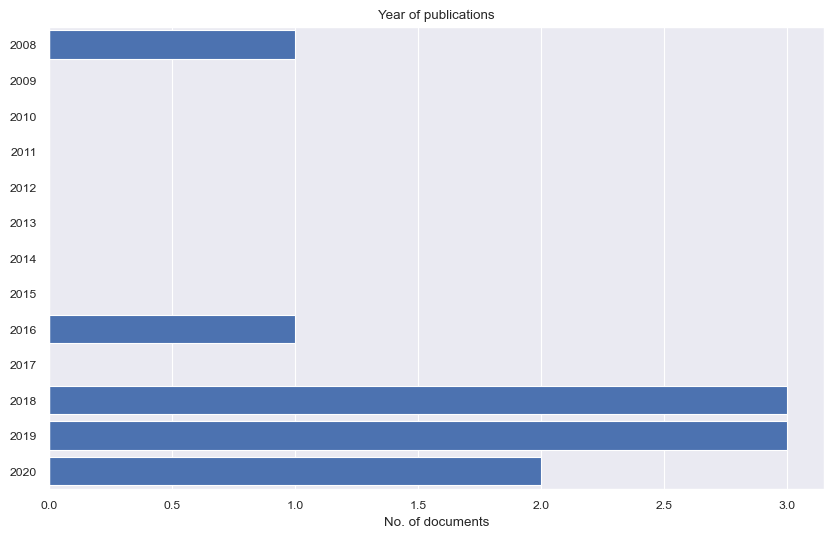

In [ ]:
# test the data has loaded by doing a very basic plot

litstudy.plot_year_histogram(docs_example);


### DOCX - no longer a candidate because of anystyle.io

### Beautiful Soup